In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


Linear Regression Coefficients:
          Coefficient
coffee       0.177513
tea         -0.009518
vibe         0.247946
internet    -2.265703
food        -0.246738
alcohol     -0.412319
seating     -0.779061
service      0.871320
parking      1.359605
location    -0.191272
local        0.889744
price        0.569549
hours       -0.502742
Mean Squared Error: 0.13234602198603987

Logistic Regression Coefficients:
          Coefficient
coffee       0.564973
tea         -0.175534
vibe         0.298480
internet    -0.852153
food         0.369251
alcohol     -0.264133
seating     -0.597660
service      1.057774
parking      0.593066
location    -0.025322
local        0.327320
price        0.476997
hours       -0.053182

Accuracy Score: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14

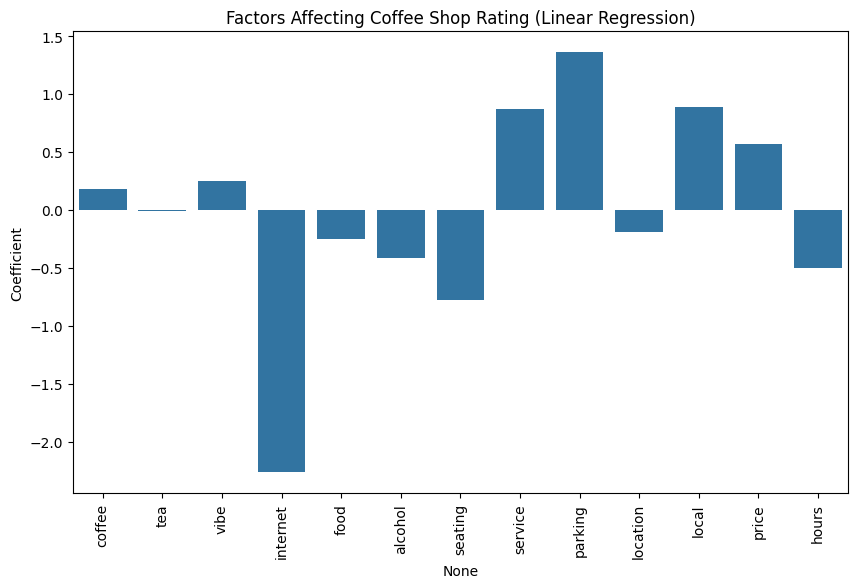

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("sentiments_by_shop.csv")

# Drop non-numeric columns (keeping only numerical features)
df_numeric = df.drop(columns=["coffee_shop_name", "num_reviews"], errors='ignore')

# Check for missing values
df_numeric.dropna(inplace=True)

# Split dependent and independent variables
X = df_numeric.drop(columns=["rating"])
y = df_numeric["rating"]

# Linear Regression Analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Display results
print("Linear Regression Coefficients:")
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Logistic Regression Analysis (Convert rating to binary: High = 1, Low = 0)
df_numeric["rating_binary"] = (df_numeric["rating"] >= df_numeric["rating"].median()).astype(int)
y_binary = df_numeric["rating_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_binary = log_reg.predict(X_test_scaled)

# Display logistic regression results
print("\nLogistic Regression Coefficients:")
coeff_df_log = pd.DataFrame(log_reg.coef_[0], X.columns, columns=["Coefficient"])
print(coeff_df_log)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))

# Visualization of factors affecting rating
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_df.index, y=coeff_df["Coefficient"])
plt.xticks(rotation=90)
plt.title("Factors Affecting Coffee Shop Rating (Linear Regression)")
plt.show()


Linear Regression Coefficients:
          Coefficient
coffee       0.177513
tea         -0.009518
vibe         0.247946
internet    -2.265703
food        -0.246738
alcohol     -0.412319
seating     -0.779061
service      0.871320
parking      1.359605
location    -0.191272
local        0.889744
price        0.569549
hours       -0.502742
Mean Squared Error: 0.13234602198603987

Logistic Regression Coefficients:
          Coefficient
coffee       0.564973
tea         -0.175534
vibe         0.298480
internet    -0.852153
food         0.369251
alcohol     -0.264133
seating     -0.597660
service      1.057774
parking      0.593066
location    -0.025322
local        0.327320
price        0.476997
hours       -0.053182

Accuracy Score: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.71      0.71      0.71         7

    accuracy                           0.71        14

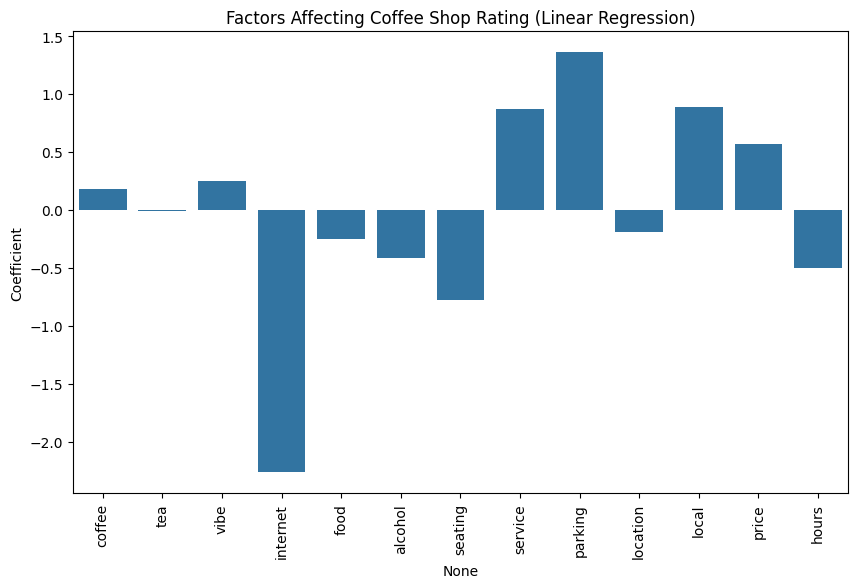


Managerial Implications:
1. Improve low-scoring factors such as service, food, or internet if they negatively impact ratings.
2. Focus on enhancing customer experience in key areas contributing positively to ratings.
3. Adjust pricing or seating capacity based on customer sentiment analysis.
4. Leverage targeted marketing for factors that strongly influence high ratings.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("sentiments_by_shop.csv")

# Drop non-numeric columns (keeping only numerical features)
df_numeric = df.drop(columns=["coffee_shop_name", "num_reviews"], errors='ignore')

# Check for missing values
df_numeric.dropna(inplace=True)

# Split dependent and independent variables
X = df_numeric.drop(columns=["rating"])
y = df_numeric["rating"]

# Linear Regression Analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Display results
print("Linear Regression Coefficients:")
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Logistic Regression Analysis (Convert rating to binary: Positive = 1, Negative = 0)
df_numeric["rating_binary"] = (df_numeric["rating"] >= df_numeric["rating"].median()).astype(int)
y_binary = df_numeric["rating_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_binary = log_reg.predict(X_test_scaled)

# Display logistic regression results
print("\nLogistic Regression Coefficients:")
coeff_df_log = pd.DataFrame(log_reg.coef_[0], X.columns, columns=["Coefficient"])
print(coeff_df_log)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))

# Visualization of factors affecting rating
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_df.index, y=coeff_df["Coefficient"])
plt.xticks(rotation=90)
plt.title("Factors Affecting Coffee Shop Rating (Linear Regression)")
plt.show()

# Managerial Implications
print("\nManagerial Implications:")
print("1. Improve low-scoring factors such as service, food, or internet if they negatively impact ratings.")
print("2. Focus on enhancing customer experience in key areas contributing positively to ratings.")
print("3. Adjust pricing or seating capacity based on customer sentiment analysis.")
print("4. Leverage targeted marketing for factors that strongly influence high ratings.")


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Load the review data
df_reviews = pd.read_csv("raw_yelp_review_data.csv")

# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

df_reviews["clean_review"] = df_reviews["full_review_text"].apply(preprocess_text)

# Sentiment Analysis
df_reviews["sentiment_polarity"] = df_reviews["clean_review"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_reviews["sentiment_category"] = df_reviews["sentiment_polarity"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")

# Word Frequency Analysis
vectorizer = CountVectorizer(max_features=20, stop_words='english')
word_matrix = vectorizer.fit_transform(df_reviews["clean_review"])
word_freq = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# WordCloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df_reviews["clean_review"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

# Topic Modeling using LDA
lda_vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
lda_matrix = lda_vectorizer.fit_transform(df_reviews["clean_review"])
lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
lda_model.fit(lda_matrix)

# Display Top Words per Topic
words = np.array(lda_vectorizer.get_feature_names_out())
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic {topic_idx+1}: {', '.join(words[topic.argsort()[-10:]])}")

# Merge with ratings data
df_sentiments = pd.read_csv("sentiments_by_shop.csv")
df_merged = df_reviews.groupby("coffee_shop_name")["sentiment_polarity"].mean().reset_index()
df_final = pd.merge(df_sentiments, df_merged, on="coffee_shop_name", how="left")

# Correlation between Sentiment and Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_final["sentiment_polarity"], y=df_final["rating"])
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Coffee Shop Rating")
plt.title("Relationship Between Sentiment and Ratings")
plt.show()

# Managerial Insights
print("\nManagerial Insights:")
print("1. Identify common positive and negative themes to improve customer experience.")
print("2. Optimize menu or services based on frequently mentioned words in high/low ratings.")
print("3. Address major pain points identified from negative reviews.")
print("4. Use topic modeling insights for targeted marketing strategies.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

# Download required nltk resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df_reviews = pd.read_csv("raw_yelp_review_data.csv")

# Text Preprocessing Function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
df_reviews["clean_review"] = df_reviews["full_review_text"].apply(preprocess_text)

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df_reviews["sentiment"] = df_reviews["clean_review"].apply(get_sentiment)

# Sentiment Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=df_reviews["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.show()

# Word Frequency Analysis
all_words = list(chain.from_iterable([review.split() for review in df_reviews["clean_review"]]))
word_counts = Counter(all_words)
top_words = word_counts.most_common(15)

# Plot Top Words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 15 Most Frequent Words in Reviews")
plt.show()

# Word Cloud for Common Words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df_reviews["clean_review"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words in Reviews")
plt.show()

# Save processed data
df_reviews.to_csv("processed_reviews.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')  # Optional for lemmatization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

# Download required nltk resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df_reviews = pd.read_csv("raw_yelp_review_data.csv")

# Text Preprocessing Function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

# Apply preprocessing
df_reviews["clean_review"] = df_reviews["full_review_text"].apply(preprocess_text)

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df_reviews["sentiment"] = df_reviews["clean_review"].apply(get_sentiment)

# Sentiment Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=df_reviews["sentiment"], palette="coolwarm")
plt.title("Sentiment Distribution of Reviews")
plt.show()

# Word Frequency Analysis
all_words = list(chain.from_iterable([review.split() for review in df_reviews["clean_review"]]))
word_counts = Counter(all_words)
top_words = word_counts.most_common(15)

# Plot Top Words
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 15 Most Frequent Words in Reviews")
plt.show()

# Word Cloud for Common Words
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df_reviews["clean_review"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words in Reviews")
plt.show()

# Save processed data
df_reviews.to_csv("processed_reviews.csv", index=False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import json
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download stopwords
nltk.download("stopwords")

# Load dataset
file_path = "raw_yelp_review_data.csv"  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure column names are correct
df.columns = [col.strip().lower() for col in df.columns]  # Normalize column names
assert "coffee_shop" in df.columns and "review" in df.columns and "rating" in df.columns, "Check column names"

# Convert rating to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# Compute average ratings per coffee shop
average_ratings = df.groupby("coffee_shop")["rating"].mean().reset_index()
average_ratings.columns = ["coffee_shop", "average_rating"]

# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df["sentiment_score"] = df["review"].apply(get_sentiment)
df["sentiment"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

# Extract frequent words in positive/negative reviews
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", str(text)).lower()
    words = [word for word in text.split() if word not in stop_words]
    return words

# Separate positive and negative reviews
positive_reviews = " ".join(df[df["sentiment"] == "positive"]["review"])
negative_reviews = " ".join(df[df["sentiment"] == "negative"]["review"])

# Get frequent words
positive_words = clean_text(positive_reviews)
negative_words = clean_text(negative_reviews)

common_positive = Counter(positive_words).most_common(20)
common_negative = Counter(negative_words).most_common(20)

# Filter reviews based on rating
high_rating_reviews = df[df["rating"] >= 4]
low_rating_reviews = df[df["rating"] <= 2]

# Save to structured format
df.to_csv("structured_reviews.csv", index=False)
df.to_json("structured_reviews.json", orient="records")

# Content Analysis: Word Clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color="white").generate(" ".join(positive_words)), interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color="white").generate(" ".join(negative_words)), interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud")

plt.show()

# Print summary
print("Average Ratings Per Coffee Shop:\n", average_ratings)
print("\nTop Positive Words:\n", common_positive)
print("\nTop Negative Words:\n", common_negative)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AssertionError: Check column names

In [ ]:
import pandas as pd
import json
from textblob import TextBlob
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load dataset
df = pd.read_csv("raw_yelp_review_data.csv")  # Change filename if needed

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Compute average star ratings for each coffee shop
average_ratings = df.groupby("coffee_shop_name")["star_rating"].mean().reset_index()
average_ratings.columns = ["coffee_shop_name", "average_rating"]

# Sentiment analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a score (-1 to 1)

df["clean_review"] = df["full_review_text"].apply(clean_text)
df["sentiment_score"] = df["clean_review"].apply(get_sentiment)
df["sentiment_label"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Identify frequent words/phrases in positive and negative reviews
stop_words = set(stopwords.words("english"))

def get_frequent_words(reviews):
    words = []
    for review in reviews:
        words.extend(word_tokenize(review))
    words = [word for word in words if word not in stop_words and len(word) > 2]
    return Counter(words).most_common(20)  # Top 20 frequent words

positive_reviews = df[df["sentiment_label"] == "Positive"]["clean_review"]
negative_reviews = df[df["sentiment_label"] == "Negative"]["clean_review"]

positive_words = get_frequent_words(positive_reviews)
negative_words = get_frequent_words(negative_reviews)

# Filter reviews based on star ratings
high_rated_reviews = df[df["star_rating"] >= 4]
low_rated_reviews = df[df["star_rating"] <= 2]

# Save processed data to CSV and JSON
df.to_csv("processed_reviews.csv", index=False)
df.to_json("processed_reviews.json", orient="records")

# Content analysis report
content_analysis = {
    "average_ratings": average_ratings.to_dict(orient="records"),
    "positive_words": positive_words,
    "negative_words": negative_words,
    "total_reviews": len(df),
    "positive_reviews": len(positive_reviews),
    "negative_reviews": len(negative_reviews),
}

# Save content analysis report
with open("content_analysis.json", "w") as file:
    json.dump(content_analysis, file, indent=4)

print("Analysis Complete! Processed data and insights saved.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


TypeError: agg function failed [how->mean,dtype->object]